<a href="https://colab.research.google.com/github/rama0512/Data_analytics_in_python/blob/main/students_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("students_exam_data.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
#drop unnamed column

In [4]:
df=df.drop("Unnamed: 0",axis=1)


In [5]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [ ]:
#change weekly study hours column

In [6]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("5-oct","5 - 10")

In [7]:
df["WklyStudyHours"]

0           < 5
1        5 - 10
2           < 5
3        5 - 10
4        5 - 10
          ...  
30636    5 - 10
30637    5 - 10
30638    5 - 10
30639    5 - 10
30640    5 - 10
Name: WklyStudyHours, Length: 30641, dtype: object

In [ ]:
#gender distribution

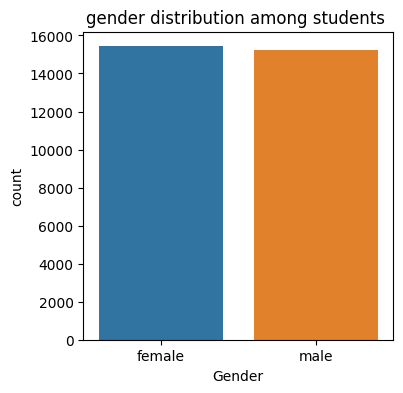

In [8]:

plt.figure(figsize=(4,4))
plt.title("gender distribution among students ")
ax=sns.countplot(data=df, x="Gender")
plt.show()


In [9]:
gb=df.groupby("ParentEduc").agg({"MathScore":"median","ReadingScore":"median","WritingScore":"median"})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,69.0,71.0,71.0
bachelor's degree,71.0,73.0,73.5
high school,64.0,67.0,66.0
master's degree,73.0,77.0,77.0
some college,66.0,69.0,69.0
some high school,63.0,65.0,64.0


In [ ]:
#heatmap

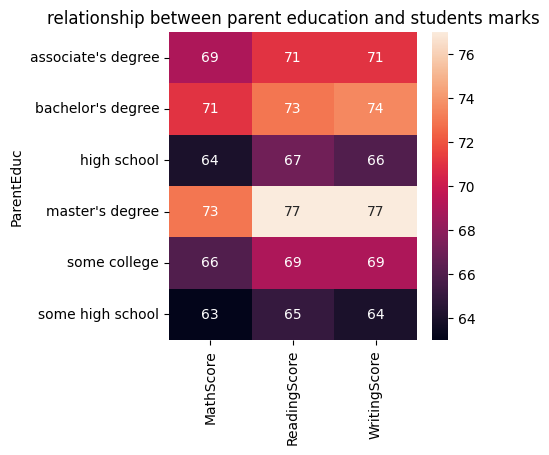

In [10]:
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True)
plt.title("relationship between parent education and students marks")
plt.show()

In [ ]:
#higher parents education leads to better marks at all subjects among all students.

In [11]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


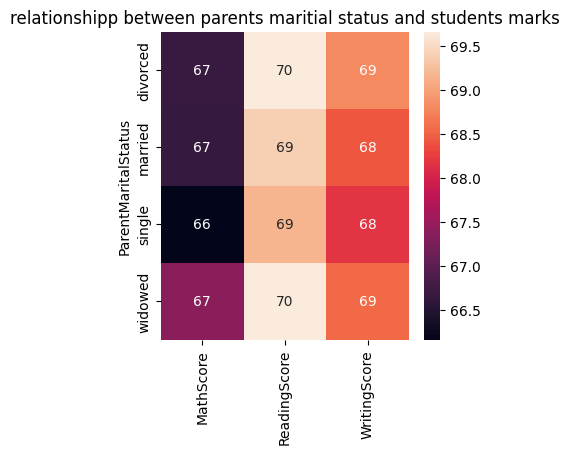

In [12]:
plt.figure(figsize= (4,4))
plt.title("relationshipp between parents maritial status and students marks")
sns.heatmap(gb1,annot=True)
plt.show()

In [ ]:
#neglible impact of marritial status and students marks.

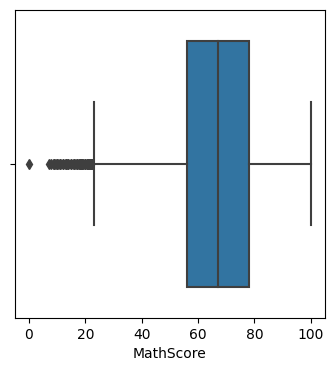

In [13]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df,x="MathScore")
plt.show()


In [22]:
q=np.delete(df["EthnicGroup"].unique(),0)
q=q.tolist()
print(q)

['group C', 'group B', 'group A', 'group D', 'group E']


2219 5826 9212


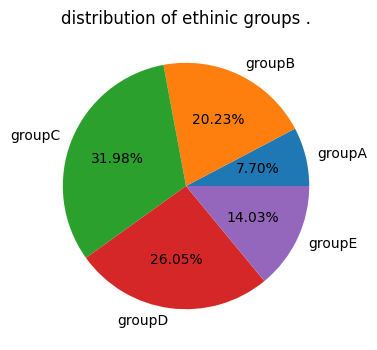

In [48]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count()
groupB=df.loc[(df["EthnicGroup"]=="group B")].count()
groupC=df.loc[(df["EthnicGroup"]=="group C")].count()
groupD=df.loc[(df["EthnicGroup"]=="group D")].count()
groupE=df.loc[(df["EthnicGroup"]=="group E")].count()
print(groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"])
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
label=["groupA","groupB","groupC","groupD","groupE"]
plt.figure(figsize=(4,4))
plt.pie(mlist,labels=label,autopct="%1.2f%%")
plt.title("distribution of ethinic groups .")
plt.show()